In [1]:
import sys
sys.path.append('../src/')

import wider_dataset

from benchmark.tools import *
from benchmark.models import Detector
from benchmark.utils import TsvHandle, run_detection, tf_to_image_faces

# https://github.com/sthanhng/yoloface
from yoloface import get_outputs_names, post_process

In [2]:
train, test, validation = tfds.load('wider_dataset', split=['train', 'test', 'validation'])
data = validation.take(30)

In [3]:
class YoloFaceDetector(Detector):
    IMG_WIDTH = 416
    IMG_HEIGHT = 416

    CONF_THRESHOLD = 0.5
    NMS_THRESHOLD = 0.4
    
    def __init__(self):
        model_cfg = '../src/yoloface/cfg/yolov3-face.cfg'
        model_weights = '../src/yoloface/model-weights/yolov3-wider_16000.weights'
        
        self.detector = cv2.dnn.readNetFromDarknet(model_cfg, model_weights)
        self.detector.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
        self.detector.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
    
    def detect(self, image):
        blob = cv2.dnn.blobFromImage(image, 1 / 255, (self.IMG_WIDTH, self.IMG_HEIGHT),
                                     [0, 0, 0], 1, crop=False)
        self.detector.setInput(blob)
        outs = self.detector.forward(get_outputs_names(self.detector))

        boxes, confidence = post_process(image, outs, self.CONF_THRESHOLD, self.NMS_THRESHOLD)

        return boxes, confidence
    
yolo_face = YoloFaceDetector()

Running detection
Speed: 1121.0003ms
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333
Ious: [0.7788707204905467, 0.856114272442225, 0.8571428571428571, 0.8163044945336753, 0.8211567732115678, 0.8721043410550905, 0.6980062191329797]
Positives: 7, False Positives: 0, Negatives: 1


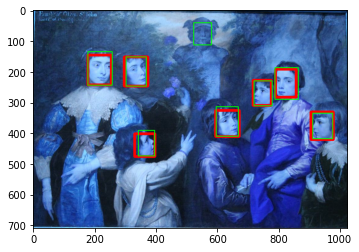

Speed: 353.4395ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 1


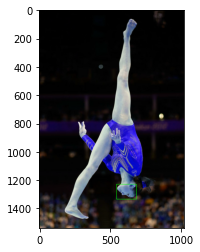

Speed: 357.6893ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8003018108651911, 0.740495867768595]
Positives: 2, False Positives: 0, Negatives: 0


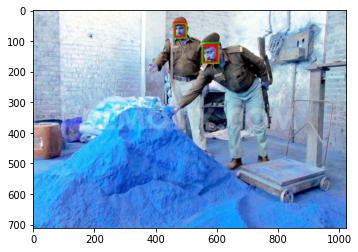

Speed: 334.2167ms
Precision: 0.9285714285714286
Recall: 0.20967741935483872
F1 Score: 0.34210526315789475
Ious: [0.7471819645732689, 0.6402116402116402, 0.7318224740321058, 0.680952380952381, 0.7983870967741935, 0.8086548488008342, 0.5803571428571429, 0.8076923076923077, 0.7791798107255521, 0.5333333333333333, 0.6221662468513854, 0.6402061855670103, 0.6157407407407407, 0.4931506849315068]
Positives: 13, False Positives: 1, Negatives: 49


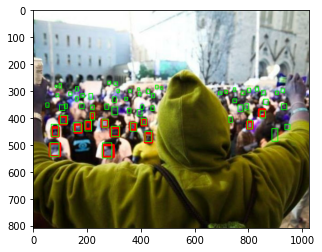

Speed: 373.0502ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8104374520337683, 0.7985791893021312, 0.8164779383053494, 0.8868458274398868, 0.8591954022988506, 0.8715415019762845, 0.7753705815279361, 0.8091018928715263]
Positives: 8, False Positives: 0, Negatives: 0


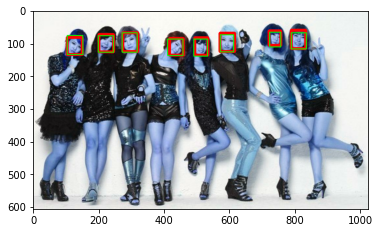

Speed: 372.2631ms
Precision: 0.6666666666666666
Recall: 0.4444444444444444
F1 Score: 0.5333333333333333
Ious: [0.65, 0.5577557755775577, 0.625, 0.0951219512195122, 0.7534246575342466, 0.45161290322580644]
Positives: 4, False Positives: 2, Negatives: 5


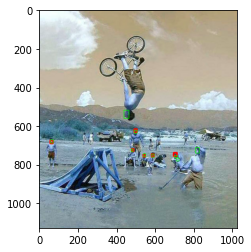

Speed: 386.5879ms
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666
Ious: [0.8152173913043478, 0.8150943396226416, 0.8199389623601221, 0.8135048231511254, 0.8111432706222865, 0.7389853137516689, 0.8485092667203867, 0.6836622807017544, 0.6008855154965211]
Positives: 9, False Positives: 0, Negatives: 9


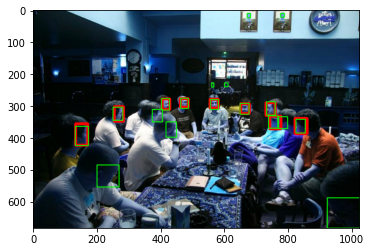

Speed: 366.2082ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.883626826526789, 0.7327823691460055, 0.9552825552825552, 0.6817113305124589]
Positives: 4, False Positives: 0, Negatives: 0


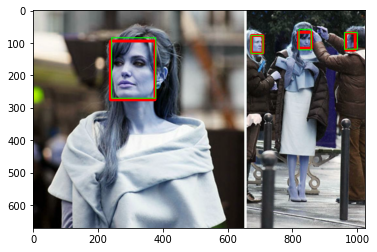

Speed: 367.1975ms
Precision: 0.6923076923076923
Recall: 0.34615384615384615
F1 Score: 0.46153846153846156
Ious: [0.8492647058823529, 0.8207261724659607, 0.580018501387604, 0.8065915004336514, 0.7316868982838007, 0.6826347305389222, 0.48427672955974843, 0.5025380710659898, 0.46905537459283386, 0.5851063829787234, 0.5, 0.7843137254901961, 0.0]
Positives: 9, False Positives: 4, Negatives: 17


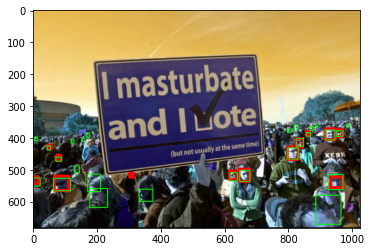

Speed: 334.286ms
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
Ious: [0.6738294394769734, 0.7816558441558441, 0.3926309729418538]
Positives: 2, False Positives: 1, Negatives: 1


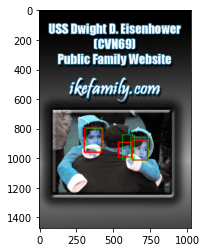

Speed: 348.7998ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8613445378151261]
Positives: 1, False Positives: 0, Negatives: 0


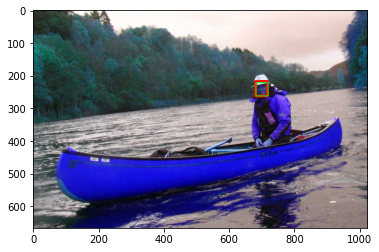

Speed: 358.3261ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8152840487903498]
Positives: 1, False Positives: 0, Negatives: 0


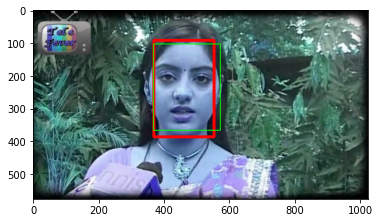

Speed: 352.5928ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8427025493454383]
Positives: 1, False Positives: 0, Negatives: 0


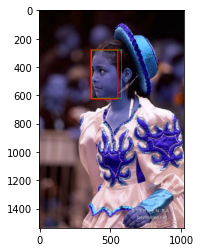

Speed: 374.914ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8785132852096452, 0.8450806118230674, 0.9013052029322367]
Positives: 3, False Positives: 0, Negatives: 0


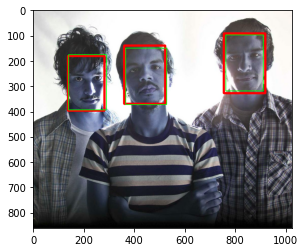

Speed: 368.7702ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8168249660786974]
Positives: 1, False Positives: 0, Negatives: 0


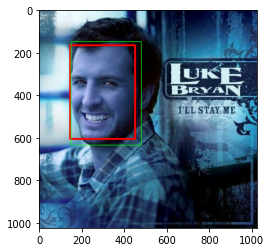

In [ ]:
with TsvHandle('yolo_face_cpu') as tsv:
    run_detection(tsv, data, yolo_face, cv2.COLOR_RGB2BGR, True, True)